## Preprocess model data: 

In [1]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [2]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

In [3]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [7]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [8]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [9]:
import datetime 

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some definitions

In [93]:
output_file = Path('Data/size_dist_noresm_SMR_lev0.nc')

In [95]:
output_file.parent.mkdir(exist_ok=True)

In [11]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

In [12]:
model_lev_i=-1
select_station = 'SMR'

In [13]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [14]:
models = ['NorESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

#### Define dictionaries:

In [15]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## Read in model data. 

In [16]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [17]:
case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

#### Variables

In [18]:
varl =[
    'apm',
    'geom',
    'airdens',
    'tempair',
    'uw',
    'vw',
    'ccn02',
    'ccn10',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'aot865nm',
    'ang550865',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'mmrtrN500',
    'mmrtrN250',
    'mmrtrN200',
    'mmrtrN100',
    'mmrtrN50',
    'mmrtrN3',
    'oh_con',
    'emi_monot_bio',
    'emi_isop_bio',
    'SO2_gas',
    'APIN_gas',
    'TBETAOCI_gas',
    'BPIN_gas',
    'LIMON_gas',
    'SABIN_gas',
    'MYRC_gas',
    'CARENE3_gas',
    'ISOP_gas',
    'VBS0_gas',
    'VBS1_gas',
    'VBS10_gas',
    'ORG_mass',
] 

#### Read in ECHAM-SALSA:

In [19]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bol

In [20]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-12-16 14:46:30,872 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [21]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

In [22]:
from bs_fdbck.util.BSOA_datamanip.ec_earth import fix_timestamp_ec_earth

### NORESM

#### Settings:

In [23]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [24]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [25]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

#### Cases:

In [26]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [27]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

#### Variables

In [28]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       #'NCONC01',
       'N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       #'hyam','hybm',
       #'hyai','hybi',
        'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
        'NNAT_0',
       
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

#### Read in NorESM

In [29]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC

In [30]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

got to check_if_load_raw_necessary
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc exists
Checking if //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/

In [31]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-12-16 14:46:35,504 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [32]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-12-16 14:46:38,121 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [33]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [34]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [35]:
dic_ds = {case_mod: ds_comb}

In [36]:
dic_mod_ca['NorESM'] = dic_ds.copy()

In [37]:
ds_comb

<xarray.Dataset>
Dimensions:     (time: 61345, station: 7, lev: 32)
Coordinates:
  * time        (time) datetime64[ns] 2012-01-02 ... 2019-01-01
  * station     (station) object 'SMR' 'HTM' 'VHL' 'BIR' 'ATTO' 'SGP' 'SMR4'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/83)
    ACTREL      (station, time) float32 dask.array<chunksize=(7, 26280), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    ...          ...
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    isoprene    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>
    monoterp    (station, time, lev) float32 dask.array<chunksize=(7, 26280, 32), meta=np.ndarray>

## SELECT STATION:


In [38]:
for mod in dic_mod_ca.keys():
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
NorESM


## Select level: 

In [39]:
for mod in dic_mod_ca.keys():
    if mod=='EC-Earth':
        continue
    print(mod)
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        dic_mod_ca[mod][ca].load()

ECHAM-SALSA
NorESM


TM5 has model levels going from the ground and up, IFS from the top and down. 

## Adjust NorESM

In [40]:
ds_noresm = dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

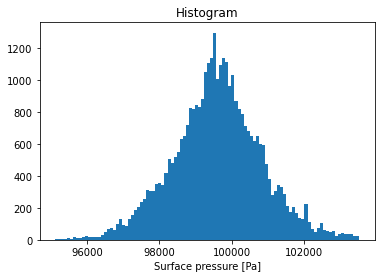

In [41]:
ds['PS'].sel(station=select_station).plot.hist(bins=100);

In [48]:
ds_noresm['NMR01'].min()#.plot()

<xarray.DataArray 'NMR01' ()>
array(13.505337, dtype=float32)
Coordinates:
    station  <U3 'SMR'
    lev      float64 992.6
Attributes:
    mdims:         1
    units:         nm
    long_name:     number median radius mode 01
    cell_methods:  time: mean

In [86]:
def dNdlogD_modal(NCONC, NMD, SIGMA, diameter):
    """

    :param NCONC:
    :param DMR: in diameter!!
    :param SIGMA:
    :param diameter:
    :return:
    """
    da = NCONC / (np.log(SIGMA) * np.sqrt(2 * np.pi)) * np.exp(
        -(np.log(diameter) - np.log(NMD)) ** 2 / (2 * np.log(SIGMA) ** 2))
    return da

def compute_total_dNdlogD_noresm(ds, diameter):
    ds_pnsd = ds.drop_vars(ds.data_vars)
    ds_pnsd = ds_pnsd.assign_coords(diameter=diameter)
    print(ds_pnsd)
    print()
    if 'NNAT_0' in ds.data_vars:
        ds['SIGMA00'] = 1.6  # Kirkevag et al 2018
        ds['SIGMA00'].attrs['units'] = '-'  # Kirkevag et al 2018
        ds['NMR00'] =  62.6  # nm Kirkevag et al 2018
        ds['NMR00'].attrs['units'] = 'nm'  # nm Kirkevag et al 2018
        ds['NCONC00'] = ds['NNAT_0']
    for i in range(14):
        NCONC = ds[f'NCONC{i:02d}']
        SIGMA = ds[f'SIGMA{i:02d}']
        NMD = ds[f'NMR{i:02d}']*2.
        dNdlogD = dNdlogD_modal(NCONC,NMD, SIGMA, ds_pnsd['diameter'])
        ds_pnsd[f'dNdlog10D{i:02d}'] = dNdlogD.copy()*np.log(10)
    return ds_pnsd


In [87]:

def lognormal_julia(x, N, mu, sigma):
    """
    Function that defines the lognormal distribution.
    Parameters:
        x        :   (np.array) The particle diameters (in micrometres) at which you wan to evaluate dN/dlogD
        N        :   The number concentration in this particular aerosol mode (MODEL OUTPUT)
        mu       :   The mean modal radius (NB!) (MODEL OUTPUT)
        sigma :   The  standard deviation of this mode (MODEL OUTPUT)
    Returns an array of the same size as x, with dNdlogD values.
    """
    logsigma = np.log10(sigma)
    return N * (1/np.sqrt(2*np.pi)) * (1/logsigma) * np.exp(-np.log10(x/(2*mu))**2 / (2 * logsigma**2))

### Run ds2df NorESM

In [123]:
diameter = np.logspace(1,3)
diameter

array([  10.        ,   10.98541142,   12.06792641,   13.25711366,
         14.56348478,   15.9985872 ,   17.57510625,   19.30697729,
         21.20950888,   23.29951811,   25.59547923,   28.11768698,
         30.88843596,   33.93221772,   37.2759372 ,   40.94915062,
         44.98432669,   49.41713361,   54.28675439,   59.63623317,
         65.51285569,   71.9685673 ,   79.06043211,   86.85113738,
         95.40954763,  104.81131342,  115.13953993,  126.48552169,
        138.94954944,  152.64179672,  167.68329368,  184.20699693,
        202.35896477,  222.29964825,  244.20530945,  268.26957953,
        294.70517026,  323.74575428,  355.64803062,  390.69399371,
        429.19342601,  471.48663635,  517.94746792,  568.9866029 ,
        625.05519253,  686.648845  ,  754.31200634,  828.64277285,
        910.29817799, 1000.        ])

In [124]:
ds_pnsd = compute_total_dNdlogD_noresm(ds_noresm, diameter)

<xarray.Dataset>
Dimensions:   (time: 61345, diameter: 50)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
    lev       float64 992.6
  * diameter  (diameter) float64 10.0 10.99 12.07 13.26 ... 828.6 910.3 1e+03
Data variables:
    *empty*



In [125]:
ds_pnsd['dNdlog10D'] = ds_pnsd.to_array(dim='var', name='dNdlog10D').sum('var')

In [126]:
from dask.diagnostics import ProgressBar

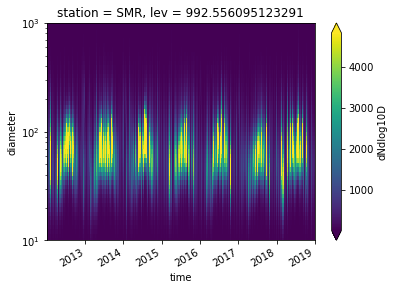

In [127]:
ds_pnsd['dNdlog10D'].plot(x='time', yscale='log', robust=True, ylim=[10,1000])

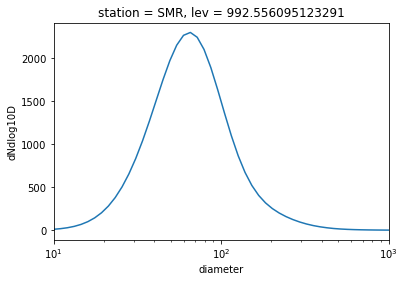

In [128]:
ds_pnsd['dNdlog10D'].mean('time').plot(xlim=[10,1000], xscale='log')

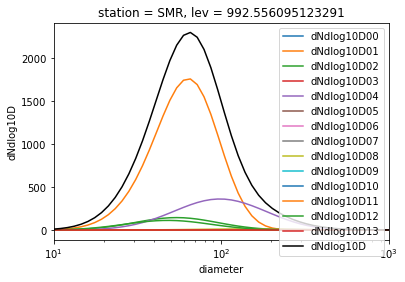

In [129]:
for v in ds_pnsd.data_vars:
    if v=='dNdlog10D':
        ds_pnsd[v].mean('time').plot(label=v, xscale='log', xlim = [10,1000], c='k')
        continue
        
    ds_pnsd[v].mean('time').plot(label=v, xscale='log', xlim = [10,1000])
    
plt.legend()

### Write to file

In [130]:
with ProgressBar():
    ds_pnsd.to_netcdf(output_file)

## Compare to Julia: 

In [76]:
dNlogN01 = lognormal_julia(ds_pnsd['diameter'], ds_noresm['NCONC01'], ds_noresm['NMR01'], ds_noresm['SIGMA01'])

In [77]:
dNlogN01

<xarray.DataArray (time: 61345, diameter: 50)>
array([[1.40594027e-10, 1.21447802e-09, 9.61669525e-09, ...,
        2.05367473e-07, 2.97156073e-08, 3.94140416e-09],
       [2.34643968e-10, 1.93929049e-09, 1.47134814e-08, ...,
        2.03916310e-07, 3.02080877e-08, 4.10802998e-09],
       [3.36068657e-10, 2.68983801e-09, 1.97841430e-08, ...,
        2.00065401e-07, 3.01467906e-08, 4.17448764e-09],
       ...,
       [1.47105962e-09, 9.65501859e-09, 5.86188632e-08, ...,
        9.83824233e-08, 1.65816564e-08, 2.58523331e-09],
       [2.09021055e-10, 1.54946133e-09, 1.05849837e-08, ...,
        7.15347056e-08, 1.13995715e-08, 1.67409077e-09],
       [4.40223010e-12, 4.20452680e-11, 3.67136389e-10, ...,
        4.14973227e-08, 5.86357896e-09, 7.57480399e-10]])
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
    lev       float64 992.6
  * diameter  (diameter) float64 1.0 1.151 1.326 1.526 ... 754.3 868.5 1e+03
Attributes:
    mdims:         1
    units:         #/cm3
    long_name:     number concentration mode 01
    cell_methods:  time: mean

In [67]:
ds_pnsd_0 = ds_pnsd.isel(time=0)

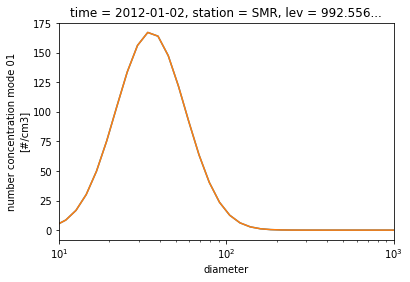

In [79]:
    (np.log(10)*ds_pnsd_0['dNdlnD01']).plot(label=v, xscale='log', xlim = [10,1000])
    dNlogN01.isel(time=0).plot()

In [50]:
ds_pnsd = ds_noresm.drop_vars(ds_noresm.data_vars)
ds_pnsd = ds_pnsd.assign_coords(diameter=np.logspace(0,3))

In [51]:
ds_pnsd

<xarray.Dataset>
Dimensions:   (time: 61345, diameter: 50)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
    lev       float64 992.6
  * diameter  (diameter) float64 1.0 1.151 1.326 1.526 ... 754.3 868.5 1e+03
Data variables:
    *empty*

In [ ]:
ds_noresm['NMR']

In [71]:
dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], 
                                            model_lev_i=model_lev_i, 
                                            air_density=air_dens,
                                            select_hours_clouds=False,
                                            mask_cloud_values = False,
#                   from_hour=8,
#                   to_hour=14,
#                   varl_cl=None,
#                   varl_st = None,
          mask_summer = False,
                                            return_summer_median=False, 
                                            take_daily_median=False
                                )


dic_df_mod_case['NorESM'] = dic_df.copy()
#dic_dfsm_mod_case['NorESM'] = dic_df_sm.copy()

hey
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR


<AxesSubplot:xlabel='time'>

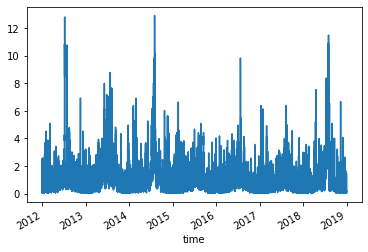

In [72]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['OA'].plot()

<AxesSubplot:xlabel='time'>

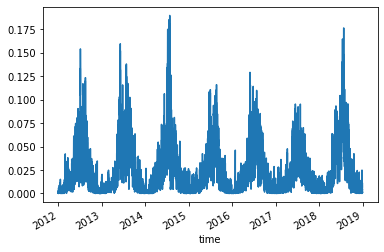

In [73]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['SOA_NA'].plot()

## SHIFT TIME to local time: Easter european winter time EET UTC+2

In [74]:
import datetime

In [75]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind + datetime.timedelta(hours=2)

In [76]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-02 02:00:00', '2012-01-02 03:00:00',
               '2012-01-02 04:00:00', '2012-01-02 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


## Write to file:

In [77]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_EC-Earth_ECE3_output_Sara.csv


<AxesSubplot:xlabel='time'>

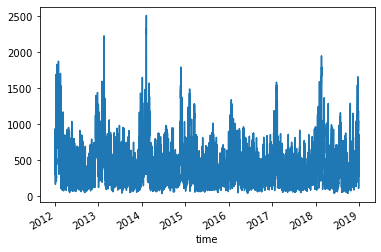

In [78]:
dic_df_mod_case[mod][ca]['N100'].plot()